# Monte Carlo Simulations

Monte Carlo simulations use random sampling to predict future prices by simulating various scenarios and assessing potential outcomes. This technique helps estimate the range of possible price movements based on historical data and relevant factors, providing a probabilistic view of future market conditions. Traders and investors can use this information to make more informed decisions, though it's important to consider the limitations and uncertainties inherent in the simulation process.

I have just shown how the simulations work and hwo useful it is to predict the potential outcomes

In [1]:
#import libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Download historical stock data
ticker = '^NSEI'
start_date = '2022-01-01'
end_date = '2024-01-10'
num_simulations = 1000
num_days = 10


stock_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
returns = stock_data.pct_change().dropna()
start_price = stock_data.iloc[-1]


[*********************100%***********************]  1 of 1 completed


In [3]:

# Perform Monte Carlo simulations
simulation_matrix = np.zeros((num_simulations, num_days))
simulation_matrix[:, 0] = start_price

for i in range(1, num_days):
    daily_returns = np.random.normal(returns.mean(), returns.std(), num_simulations)
    simulation_matrix[:, i] = simulation_matrix[:, i - 1] * (1 + daily_returns)



In [4]:
# Print the predicted prices for the upcoming days
for i in range(num_days):
    day = i + 1
    percentile_95 = np.percentile(simulation_matrix[:, i], 95)
    percentile_98 = np.percentile(simulation_matrix[:, i], 98)
    percentile_99 = np.percentile(simulation_matrix[:, i], 99)
    
    print(f"Day {day} Predicted Prices:")
    print(f"95th Percentile: {percentile_95:.2f}")
    print(f"98th Percentile: {percentile_98:.2f}")
    print(f"99th Percentile: {percentile_99:.2f}")
    print()


Day 1 Predicted Prices:
95th Percentile: 21544.85
98th Percentile: 21544.85
99th Percentile: 21544.85

Day 2 Predicted Prices:
95th Percentile: 21882.43
98th Percentile: 21949.56
99th Percentile: 22008.63

Day 3 Predicted Prices:
95th Percentile: 22015.03
98th Percentile: 22090.81
99th Percentile: 22158.72

Day 4 Predicted Prices:
95th Percentile: 22094.85
98th Percentile: 22242.85
99th Percentile: 22368.57

Day 5 Predicted Prices:
95th Percentile: 22192.40
98th Percentile: 22354.89
99th Percentile: 22475.87

Day 6 Predicted Prices:
95th Percentile: 22262.00
98th Percentile: 22411.78
99th Percentile: 22553.60

Day 7 Predicted Prices:
95th Percentile: 22333.90
98th Percentile: 22483.78
99th Percentile: 22632.45

Day 8 Predicted Prices:
95th Percentile: 22374.51
98th Percentile: 22631.00
99th Percentile: 22720.81

Day 9 Predicted Prices:
95th Percentile: 22468.33
98th Percentile: 22678.29
99th Percentile: 22862.15

Day 10 Predicted Prices:
95th Percentile: 22498.47
98th Percentile: 22751

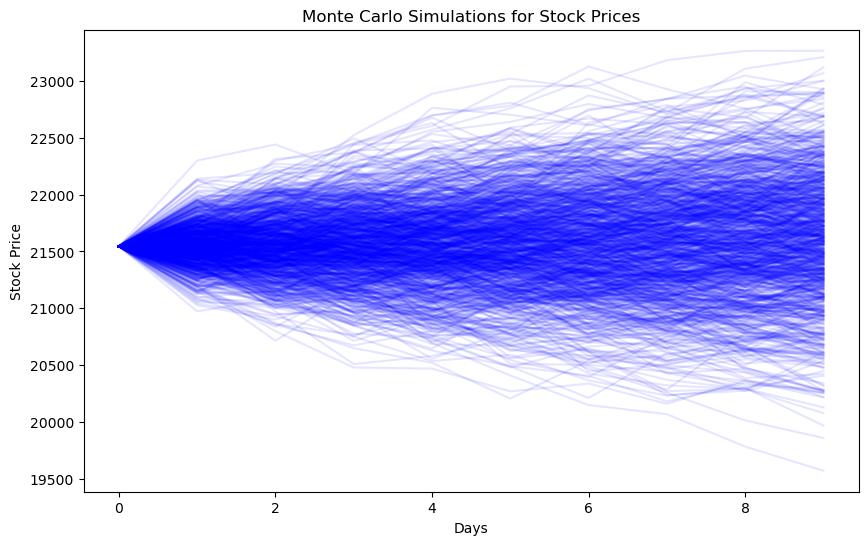

In [5]:
# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))
plt.plot(simulation_matrix.T, color='blue', alpha=0.1)
plt.title('Monte Carlo Simulations for Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()
